In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx
import mltools as ml
import random
import warnings; warnings.simplefilter('ignore')

## 1 Clustering, 45 points

The code this week provides the three clustering algorithms we discussed: k-means, agglomerative clustering, and
EM for Gaussian mixture models; we will explore the first two here. (These functions are also provided in many
3rd party toolboxes; you are free to use those if you prefer.) In this problem, you’ll do some basic exploration of
the clustering techniques.

1. Load the usual Iris data restricted to the first two features, and ignore the class / target variable. Plot the
data and see for yourself how “clustered” you think it looks. Include the plot, and mention how many clusters
you think exist (no wrong answer here).

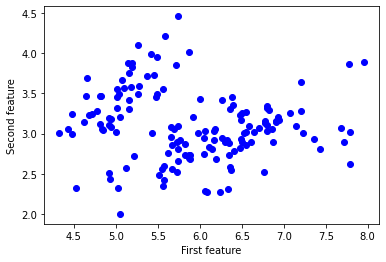

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) 
plt.plot(iris[:,0], iris[:,1], 'bo')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

Based on the plot, I can see two clusters. One is on the top left, the other is at the bottom right. My observed split line of these two clusters roughly goes through (0,2.4) and (4.5,6.7) 

2. Run k-means on the data, for k = 2, k = 5, and k = 20. Try a few (at least 5 each) different initializations
and check to see whether they find the same solution; if not, pick the one with the best score. For the chosen
assignment for each k, include a plot with the data, colored by assignment, and the cluster centers. You can
plot the points colored by assignments using ml.plotClassify2D(None,X,z) , where z are the resulting
cluster assignments of the data. You will have to additionally plot the centers yourself.

### k = 2

In [3]:
random.seed(12345)
X = iris[:,0:2]
Y = iris[:,-1]
z2_1, c2_1, sumd2_1 = ml.cluster.kmeans(X, 2, init = "random", max_iter = 100)
z2_2, c2_2, sumd2_2 = ml.cluster.kmeans(X, 2, init = "farthest", max_iter = 100)
z2_3, c2_3, sumd2_3 = ml.cluster.kmeans(X, 2, init = "k++", max_iter = 100)
z2_4, c2_4, sumd2_4 = ml.cluster.kmeans(X, 2, init = "random", max_iter = 1000)
z2_5, c2_5, sumd2_5 = ml.cluster.kmeans(X, 2, init = "random", max_iter = 10000)
sum2_1_1000 = []
sum2_2_1000 = []
sum2_3_1000 = []
sum2_4_1000 = []
sum2_5_1000 = []

In [4]:
for round in range(0, 100):
    z2_1, c2_1, sumd2_1 = ml.cluster.kmeans(X, 2, init = "random", max_iter = 100)
    z2_2, c2_2, sumd2_2 = ml.cluster.kmeans(X, 2, init = "farthest", max_iter = 100)
    z2_3, c2_3, sumd2_3 = ml.cluster.kmeans(X, 2, init = "k++", max_iter = 100)
    z2_4, c2_4, sumd2_4 = ml.cluster.kmeans(X, 2, init = "random", max_iter = 1000)
    z2_5, c2_5, sumd2_5 = ml.cluster.kmeans(X, 2, init = "random", max_iter = 10000)
    sum2_1_1000.append(sumd2_1)
    sum2_2_1000.append(sumd2_2)
    sum2_3_1000.append(sumd2_3)
    sum2_4_1000.append(sumd2_4)
    sum2_5_1000.append(sumd2_5)

In [5]:
z2 = [z2_1, z2_2, z2_3, z2_4, z2_5]
c2 = [c2_1, c2_2, c2_3, c2_4, c2_5]
sumd2 = [sumd2_1, sumd2_2, sumd2_3, sumd2_4, sumd2_5]
inits2 = ["random", "farthest", "k++", "random", "random"]
max_iters2 = [100,100,100,1000,10]

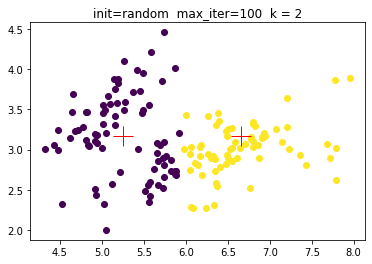

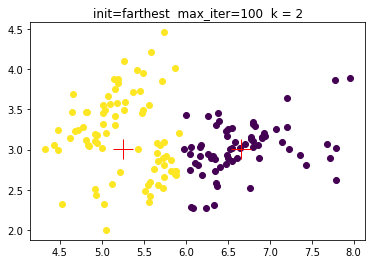

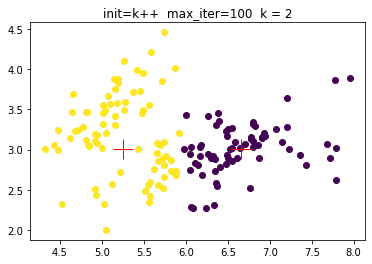

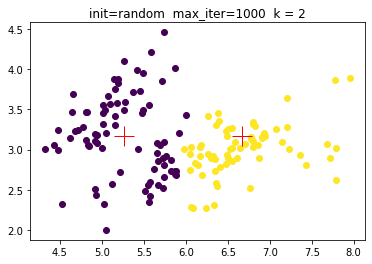

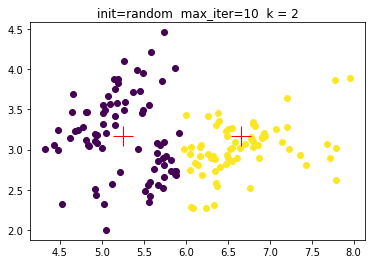

In [6]:
for i in range(0, 5):
    plt.figure()
    ml.plotClassify2D(None, X, z2[i])
    plt.plot(c2[i][0,0], c2[i][0,1], marker='+', color = "red", markersize=20)
    plt.plot(c2[i][1,0], c2[i][0,1], marker='+', color = "red", markersize=20)
    plt.title("init=" + str(inits2[i]) + "  max_iter=" + str(max_iters2[i]) + "  k = 2")  

In [7]:
print('Average SSE %0.3f' % np.mean(sum2_1_1000) + " with init=" + str(inits2[0]) + ",  max_iter=" + str(max_iters2[0]) + ",  k = 2")
print('Average SSE %0.3f' % np.mean(sum2_2_1000) + " with init=" + str(inits2[1]) + ",  max_iter=" + str(max_iters2[1]) + ",  k = 2")
print('Average SSE %0.3f' % np.mean(sum2_3_1000) + " with init=" + str(inits2[2]) + ",  max_iter=" + str(max_iters2[2]) + ",  k = 2")
print('Average SSE %0.3f' % np.mean(sum2_4_1000) + " with init=" + str(inits2[3]) + ",  max_iter=" + str(max_iters2[3]) + ",  k = 2")
print('Average SSE %0.3f' % np.mean(sum2_5_1000) + " with init=" + str(inits2[4]) + ",  max_iter=" + str(max_iters2[4]) + ",  k = 2")

Average SSE 57.878 with init=random,  max_iter=100,  k = 2
Average SSE 57.879 with init=farthest,  max_iter=100,  k = 2
Average SSE 57.878 with init=k++,  max_iter=100,  k = 2
Average SSE 57.878 with init=random,  max_iter=1000,  k = 2
Average SSE 57.878 with init=random,  max_iter=10,  k = 2


Since we cannot initalize the starting point, the output computed by the same methods with same parameters are slightly different. I tried to run the above code for 100 times. With k = 2, on average, there are no obvious difference among different initializations. There general SSE are similar, and all clusters roughly give the same output.

### K = 5

SSE 20.906 with init=random,  max_iter=100,  k = 5
SSE 21.341 with init=farthest,  max_iter=100,  k = 5
SSE 20.867 with init=k++,  max_iter=100,  k = 5
SSE 26.655 with init=random,  max_iter=1000,  k = 5
SSE 21.341 with init=random,  max_iter=10,  k = 5


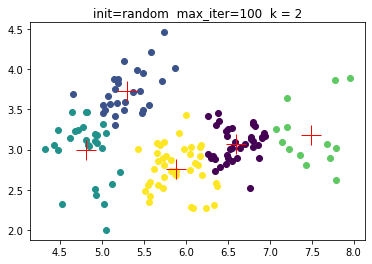

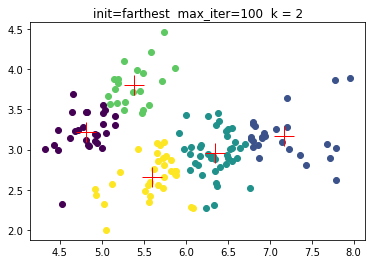

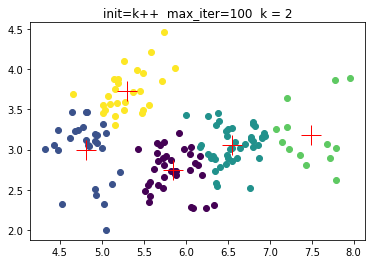

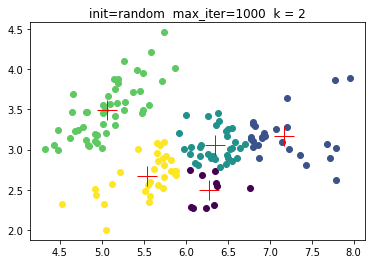

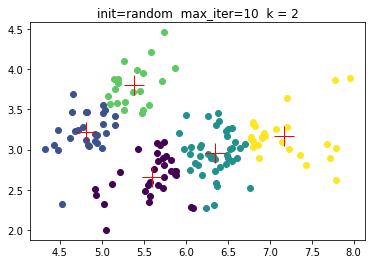

In [8]:
random.seed(12345)
X = iris[:,0:2]
Y = iris[:,-1]
z5_1, c5_1, sumd5_1 = ml.cluster.kmeans(X, 5, init = "random", max_iter = 100)
z5_2, c5_2, sumd5_2 = ml.cluster.kmeans(X, 5, init = "farthest", max_iter = 100)
z5_3, c5_3, sumd5_3 = ml.cluster.kmeans(X, 5, init = "k++", max_iter = 100)
z5_4, c5_4, sumd5_4 = ml.cluster.kmeans(X, 5, init = "random", max_iter = 1000)
z5_5, c5_5, sumd5_5 = ml.cluster.kmeans(X, 5, init = "random", max_iter = 10000)
z5 = [z5_1, z5_2, z5_3, z5_4, z5_5]
c5 = [c5_1, c5_2, c5_3, c5_4, c5_5]
sumd5 = [sumd5_1, sumd5_2, sumd5_3, sumd5_4, sumd5_5]
inits5 = ["random", "farthest", "k++", "random", "random"]
max_iters5 = [100,100,100,1000,10]
for i in range(0, 5):
    plt.figure()
    ml.plotClassify2D(None, X, z5[i])
    plt.plot(c5[i][0,0], c5[i][0,1], marker='+', color = "red", markersize=20)
    plt.plot(c5[i][1,0], c5[i][1,1], marker='+', color = "red", markersize=20)
    plt.plot(c5[i][2,0], c5[i][2,1], marker='+', color = "red", markersize=20)
    plt.plot(c5[i][3,0], c5[i][3,1], marker='+', color = "red", markersize=20)
    plt.plot(c5[i][4,0], c5[i][4,1], marker='+', color = "red", markersize=20)
    plt.title("init=" + str(inits5[i]) + "  max_iter=" + str(max_iters5[i]) + "  k = 2")  
    print('SSE %0.3f' % (sumd5 [i]) + " with init=" + str(inits5[i]) + ",  max_iter=" + str(max_iters5[i]) + ",  k = 5")

In [9]:
sum5_1_1000 = []
sum5_2_1000 = []
sum5_3_1000 = []
sum5_4_1000 = []
sum5_5_1000 = []
for round in range(0, 100):
    z5_1, c5_1, sumd5_1 = ml.cluster.kmeans(X, 5, init = "random", max_iter = 100)
    z5_2, c5_2, sumd5_2 = ml.cluster.kmeans(X, 5, init = "farthest", max_iter = 100)
    z5_3, c5_3, sumd5_3 = ml.cluster.kmeans(X, 5, init = "k++", max_iter = 100)
    z5_4, c5_4, sumd5_4 = ml.cluster.kmeans(X, 5, init = "random", max_iter = 1000)
    z5_5, c5_5, sumd5_5 = ml.cluster.kmeans(X, 5, init = "random", max_iter = 10000)
    sum5_1_1000.append(sumd5_1)
    sum5_2_1000.append(sumd5_2)
    sum5_3_1000.append(sumd5_3)
    sum5_4_1000.append(sumd5_4)
    sum5_5_1000.append(sumd5_5)

In [10]:
print('Average SSE %0.3f' % np.mean(sum5_1_1000) + " with init=" + str(inits5[0]) + ",  max_iter=" + str(max_iters5[0]) + ",  k = 5")
print('Average SSE %0.3f' % np.mean(sum5_2_1000) + " with init=" + str(inits5[1]) + ",  max_iter=" + str(max_iters5[1]) + ",  k = 5")
print('Average SSE %0.3f' % np.mean(sum5_3_1000) + " with init=" + str(inits5[2]) + ",  max_iter=" + str(max_iters5[2]) + ",  k = 5")
print('Average SSE %0.3f' % np.mean(sum5_4_1000) + " with init=" + str(inits5[3]) + ",  max_iter=" + str(max_iters5[3]) + ",  k = 5")
print('Average SSE %0.3f' % np.mean(sum5_5_1000) + " with init=" + str(inits5[4]) + ",  max_iter=" + str(max_iters5[4]) + ",  k = 5")

Average SSE 22.814 with init=random,  max_iter=100,  k = 5
Average SSE 21.447 with init=farthest,  max_iter=100,  k = 5
Average SSE 22.853 with init=k++,  max_iter=100,  k = 5
Average SSE 23.101 with init=random,  max_iter=1000,  k = 5
Average SSE 22.403 with init=random,  max_iter=10,  k = 5


With k = 5, the 'farthest' method generally has better performance compared to other methods. When the maximum number of optimization iteration goes either too large or too small, the SSE would slightly increase.

### k = 20

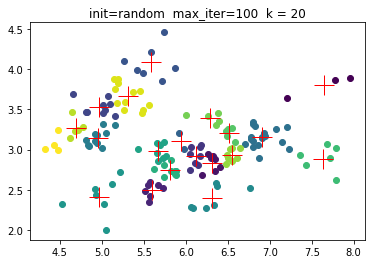

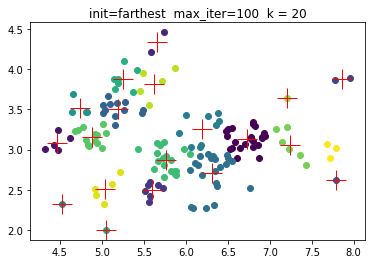

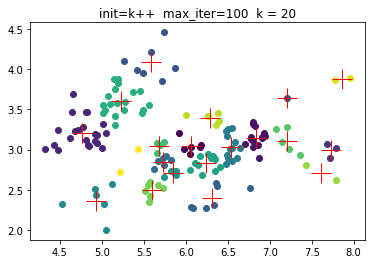

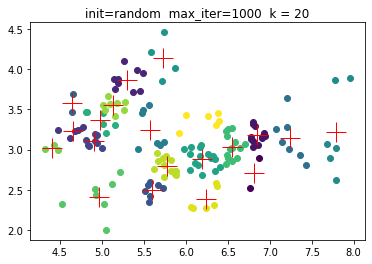

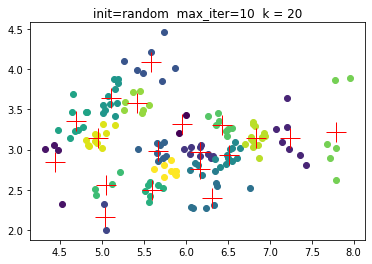

In [12]:
random.seed(12345)
X = iris[:,0:2]
Y = iris[:,-1]
z20_1, c20_1, sumd20_1 = ml.cluster.kmeans(X, 20, init = "random", max_iter = 100)
z20_2, c20_2, sumd20_2 = ml.cluster.kmeans(X, 20, init = "farthest", max_iter = 100)
z20_3, c20_3, sumd20_3 = ml.cluster.kmeans(X, 20, init = "k++", max_iter = 100)
z20_4, c20_4, sumd20_4 = ml.cluster.kmeans(X, 20, init = "random", max_iter = 1000)
z20_5, c20_5, sumd20_5 = ml.cluster.kmeans(X, 20, init = "random", max_iter = 10000)
z20 = [z20_1, z20_2, z20_3, z20_4, z20_5]
c20 = [c20_1, c20_2, c20_3, c20_4, c20_5]
sumd20 = [sumd20_1, sumd20_2, sumd20_3, sumd20_4, sumd20_5]
inits20 = ["random", "farthest", "k++", "random", "random"]
max_iters20 = [100,100,100,1000,10]
for i in range(0, 5):
    plt.figure()
    ml.plotClassify2D(None, X, z20[i])
    for j in range(0, 19):
        plt.plot(c20[i][j,0], c20[i][j,1], marker='+', color = "red", markersize=20)
    plt.title("init=" + str(inits20[i]) + "  max_iter=" + str(max_iters20[i]) + "  k = 20")  

In [13]:
sum20_1_1000 = []
sum20_2_1000 = []
sum20_3_1000 = []
sum20_4_1000 = []
sum20_5_1000 = []
for round in range(0, 100):
    z20_1, c5_1, sumd20_1 = ml.cluster.kmeans(X, 20, init = "random", max_iter = 100)
    z20_2, c5_2, sumd20_2 = ml.cluster.kmeans(X, 20, init = "farthest", max_iter = 100)
    z20_3, c5_3, sumd20_3 = ml.cluster.kmeans(X, 20, init = "k++", max_iter = 100)
    z20_4, c5_4, sumd20_4 = ml.cluster.kmeans(X, 20, init = "random", max_iter = 1000)
    z20_5, c5_5, sumd20_5 = ml.cluster.kmeans(X, 20, init = "random", max_iter = 10000)
    sum20_1_1000.append(sumd20_1)
    sum20_2_1000.append(sumd20_2)
    sum20_3_1000.append(sumd20_3)
    sum20_4_1000.append(sumd20_4)
    sum20_5_1000.append(sumd20_5)

In [14]:
print('Average SSE %0.3f' % np.mean(sum20_1_1000) + " with init=" + str(inits20[0]) + ",  max_iter=" + str(max_iters20[0]) + ",  k = 20")
print('Average SSE %0.3f' % np.mean(sum20_2_1000) + " with init=" + str(inits20[1]) + ",  max_iter=" + str(max_iters20[1]) + ",  k = 20")
print('Average SSE %0.3f' % np.mean(sum20_3_1000) + " with init=" + str(inits20[2]) + ",  max_iter=" + str(max_iters20[2]) + ",  k = 20")
print('Average SSE %0.3f' % np.mean(sum20_4_1000) + " with init=" + str(inits20[3]) + ",  max_iter=" + str(max_iters20[3]) + ",  k = 20")
print('Average SSE %0.3f' % np.mean(sum20_5_1000) + " with init=" + str(inits20[4]) + ",  max_iter=" + str(max_iters20[4]) + ",  k = 20")

Average SSE 5.286 with init=random,  max_iter=100,  k = 20
Average SSE 4.835 with init=farthest,  max_iter=100,  k = 20
Average SSE 4.654 with init=k++,  max_iter=100,  k = 20
Average SSE 5.243 with init=random,  max_iter=1000,  k = 20
Average SSE 5.323 with init=random,  max_iter=10,  k = 20


With k = 20, the 'random' method generally has better performance compared to other methods. 

3. Run agglomerative clustering on the data, using single linkage and then again using complete linkage ,
each with 2, 5, and then 20 clusters (using ml.cluster.agglomerative from cluster.py ). Again, plot
with color the final assignment of the clusters. (This algorithm has no initialization issues; so you do not have
to try multiple initializations.) (20 points)


### min 

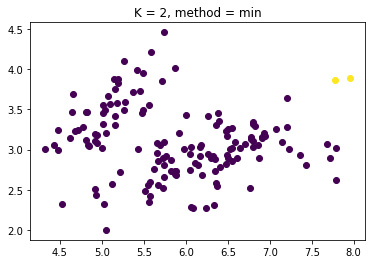

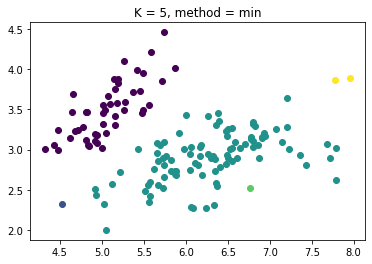

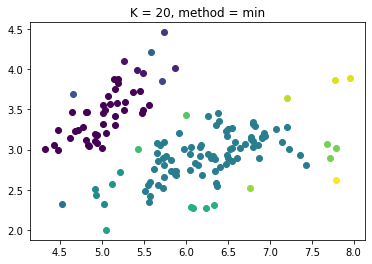

In [15]:
k = [2,5,20]
for i in range(0,3):
    temp_k = k[i]
    temp_z, join = ml.cluster.agglomerative(X, temp_k, method = "min", join=None)
    plt.figure()
    ml.plotClassify2D(None, X, temp_z)
    plt.title('K = %d, method = %s'% (temp_k, "min"))

### max

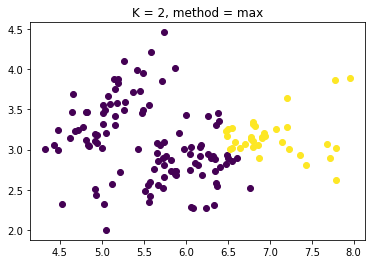

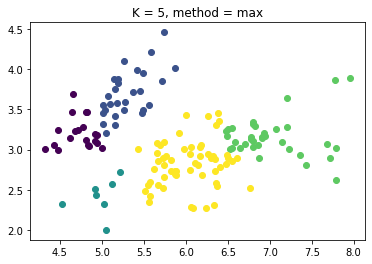

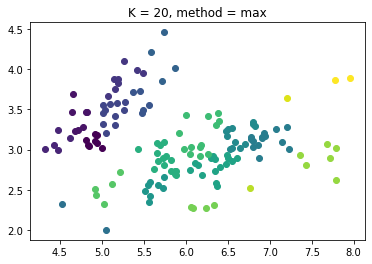

In [16]:
k = [2,5,20]
for i in range(0,3):
    temp_k = k[i]
    temp_z, join = ml.cluster.agglomerative(X, temp_k, method = "max", join=None)
    plt.figure()
    ml.plotClassify2D(None, X, temp_z)
    plt.title('K = %d, method = %s'% (temp_k, "max"))

4. Describe similarities and differences in the results from the agglomerative clustering and k-means. (5 points)

They are both unsupervised clustering methods, and they both cluster by computing the distance between points. 
Kmeans is sensitive to initial values, and different initial values tend to generate different results. Agglomerative clustering generates consistent results with the same k. Agglomerative clustering generates optimal number of clusters, whereas Kmeans genreates k clusters. Compared to Kmeans, the single linkage is sentitive to noise and outliers.

## 2 EigenFaces, 50 points

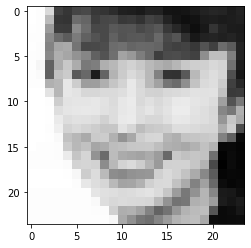

In [17]:
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
i = 24
img = np.reshape(X[i,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

1. Subtract the mean of the face images (X0 = X − µ) to make your data zero-mean. (The mean should be of
the same dimension as a face, 576 pixels.) Plot the mean face. (5 points)

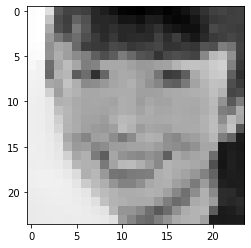

In [18]:
mu = np.mean(X, axis=0)
X0 = X - mu
img = np.reshape(X0[i,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint

2. Use scipy.linalg.svd to take the SVD of the data, so that

    X0 = U · diag(S) · Vh

    Since the number of data is larger than the number of dimensions, there are at most 576 non-zero singular
    values; you can use full_matrices=False to avoid using a lot of memory. As in the slides, we suggest
    computing W = U.dot( np.diag(S) ) so that X0 ≈ W ·Vh. Print the shapes of W and Vh. (10 points)

In [19]:
from scipy import linalg

U,S,Vh = linalg.svd(X0, full_matrices = False)
W = U.dot(np.diag(S))
print('shape of W: ' + str(W.shape))
print('shape of Vh: ' + str(Vh.shape))

shape of W: (4916, 576)
shape of Vh: (576, 576)


3. For K = 1 . . . 10, compute the approximation to X0 given by the first K eigendirections, e.g., Xˆ
0 =
W[:, : K] · V h[: K, :], and use them to compute the mean squared error in the SVD’s approximation,
np.mean( (X0 − Xˆ
0)**2 ) . Plot these MSE values as a function of K. (10 points)

Text(0, 0.5, 'MSE')

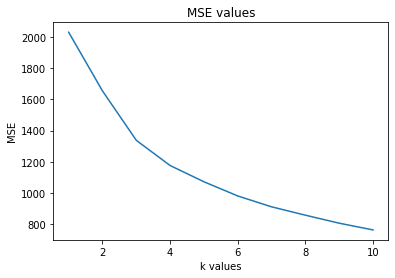

In [20]:
K = np.arange(1,11,1)
mse = []
for k in K:
    X0_hat = W[:,:k].dot(Vh[:k,:]) #approximation to x0 by using first k eigenvectors
    mse.append(np.mean((X0 - X0_hat)**2))

plt.plot(K, mse)
plt.title("MSE values")
plt.xlabel("k values")
plt.ylabel("MSE")

4. Display the first three principal directions of the data, by computing µ+α V[j,:] and µ-α V[j,:], where α is
a scale factor (we suggest, for example, 2*np.median(np.abs(W[:,j])) , to get a sense of the scale found
in the data). These should be vectors of length 242 = 576, so you can reshape them and view them as “face
images” just like the original data. They should be similar to the images in lecture. (10 points)

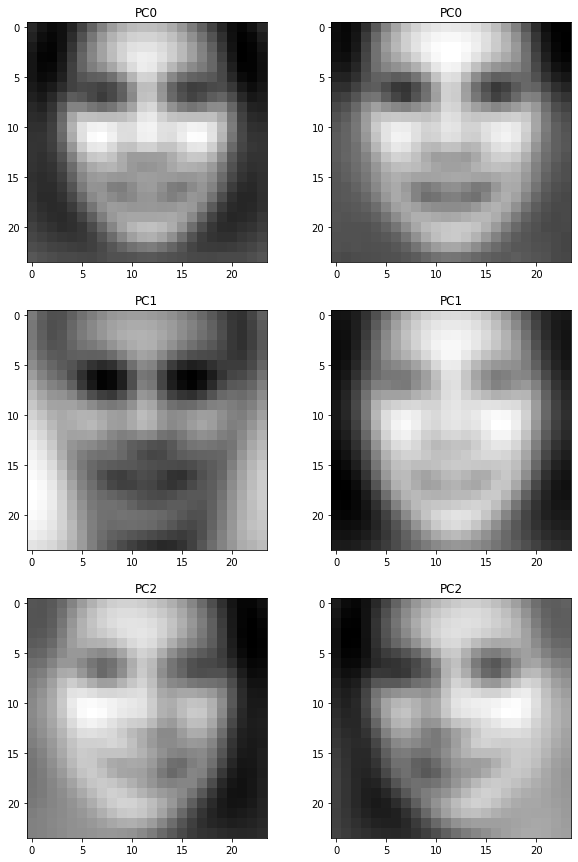

In [21]:
fix, ax = plt.subplots(3,2,figsize = (10,15))
pc = 3
for i in range(pc):
    alpha = 2*np.median(np.abs(W[:,i]))
    pc1 = np.reshape(mu+alpha*Vh[i,:],(24,24))
    pc2 = np.reshape(mu-alpha*Vh[i,:],(24,24))
    ax[i][0].imshow(pc1.T, cmap="gray")
    ax[i][0].set_title("PC" + str(i))
    ax[i][1].imshow(pc2.T, cmap="gray")
    ax[i][1].set_title("PC" + str(i))

5. Choose any two faces and reconstruct them using the first K principal directions, for K = 5, 10, 50, 100.
(5 points)

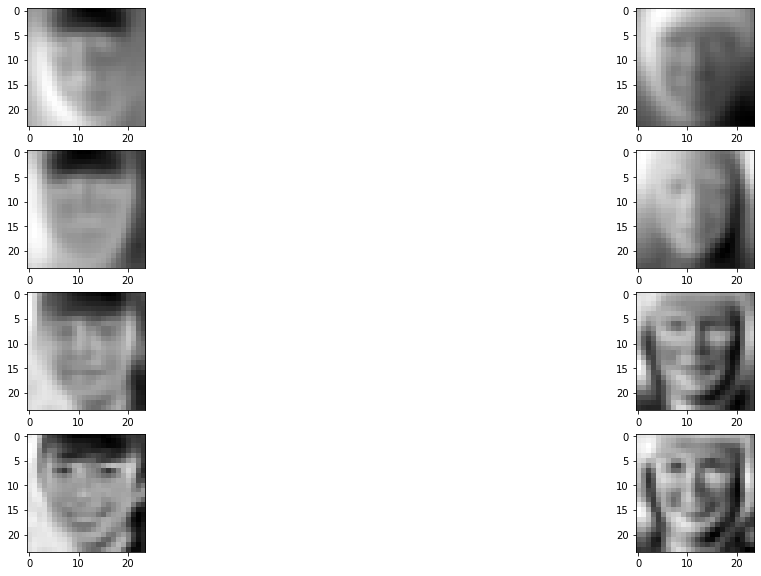

In [22]:
K = [5, 10, 50, 100]
i1 = 24
i2 = 36
fig, ax = plt.subplots(4,2, figsize=(20,10))
for i, k in enumerate(K):
    X1 = W[i1,:k].dot(Vh[:k,:])
    X2 = W[i2,:k].dot(Vh[:k,:])
    img1 = np.reshape(X1, (24,24))
    img2 = np.reshape(X2, (24,24))
    ax[i][0].imshow(img1.T, cmap="gray")
    ax[i][1].imshow(img2.T, cmap="gray")

6. Methods like PCA are often called “latent space” methods, as the coefficients can be interpreted as a new
geometric space in which the data are being described. To visualize this, choose a few faces (say 25), and
display them as images with the coordinates given by their coefficients on the first two principal components:

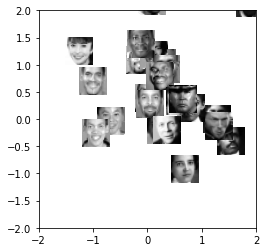

In [23]:
idx = np.arange(1,25,1) # pick some data (randomly or otherwise); an array of integer indices

import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure(); #plt.hold(True); # you may need this for pyplot
for i in idx:
    # compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale

Statement of Collaboration (5 points)

Individual work. Searched StackoverFlow for incompatible packages, errors and searched python documentation for some implementations.